In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


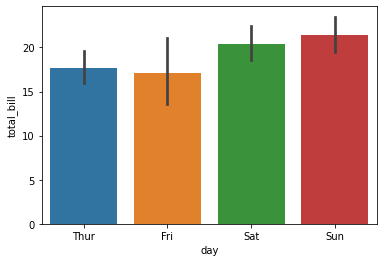

In [8]:
sns.barplot(data=tips, x="day", y="total_bill", ci=95);

In [9]:
tipsFri = tips[tips["day"] == "Fri"]

In [10]:
tipsFri.shape

(19, 7)

In [11]:
tipsFri.head()

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2


In [12]:
xbar = tipsFri["total_bill"].mean()

##### 1- Confidence Intervals Using the Normal Distribution (z)

##### A. Manual Calculation

In [13]:
#First Way
# Standart error of the mean
sem = tipsFri["total_bill"].sem()
sem

1.904760773479416

In [14]:
#Second Way-Hardcoding
tipsFri["total_bill"].std() / np.sqrt(len(tipsFri))

1.904760773479416

In [15]:
stats.norm.ppf(0.975)
# %95 güven aralığında 1.96 kabul ediyoruz.

1.959963984540054

In [16]:
moe = 1.96 * sem
moe

3.7333311160196554

In [17]:
#lower limit
upper = xbar + moe
upper

20.884910063388073

In [18]:
#upper limit
lower = xbar - moe
lower

13.418247831348761

##### A. Scipy Calculation

In [19]:
stats.norm.interval(alpha=0.95, loc=xbar, scale=sem)

(13.418316432184106, 20.88484146255273)

In [20]:
stats.norm.interval(alpha=0.95, loc=tipsFri["total_bill"].mean(), scale=tipsFri["total_bill"].sem())

(13.418316432184106, 20.88484146255273)

##### 2- Confidence Intervals Using the Student Distribution (t)

In [31]:
# örneklemimiz 19 satırdan oluştuğu için t-distribution kullanmak daha doğru sonuç verir.
stats.t.interval(alpha=0.95, df=len(tipsFri)-1, loc=tipsFri["total_bill"].mean(),scale=tipsFri["total_bill"].sem())

(13.149825056979093, 21.15333283775774)

In [ ]:
# 1- populasyonun standart sapması biliniyorsa
     # z dağılımı
# 2- populasyonun standart sapması bilinmiyorsa
    # ve örneklem sayısı 30dan büyükse z dağılımı
    # örneklem sayısı 30dan kiçükse t dağılımı kullanırız

# uygulamada çoğunluka t dağılımı kullanılıyor.

##### Example
Pazar günleri ödenen hesap ortalamaları üzerine bir güven aralığı oluşturunuz.

In [36]:
tipsSun.shape

(76, 7)

In [34]:
tipsSun = tips[tips["day"] == "Sun"]

In [35]:
stats.t.interval(alpha=0.95, df=len(tipsSun)-1, loc=tipsSun["total_bill"].mean(),scale=tipsSun["total_bill"].sem())

(19.391773706521036, 23.42822629347897)

######  Assignment-1
Suppose scores on exams in statistics are normally distributed with an unknown population mean and a population standard 
deviation of 3 points.

A random sample of 36 scores is taken and gives a sample mean (sample  mean score) of 68.

Find a confidence interval estimate for the population mean exam score (the mean score on all exams).

Find a 90% confidence interval for the true (population) mean of statistics exam scores. 

In [42]:
# We know the population standart deviaton. So, we will use z distribution.
    #stats.norm.interval(alpha, loc, scale)
        # alpha = confidence interval = 0.90
        # loc = sample mean = 68
        # scale = standart error of the mean(sem).
            #sem = std(x) / np.sqrt(len(x))
# std = 3, len = 36

# Import libraries
from scipy import stats
import numpy as np

In [28]:
sem = 3 / np.sqrt(36)
sem

0.5

In [29]:
stats.norm.interval(alpha=0.90, loc=68, scale=sem)

(67.17757318652427, 68.82242681347573)

In [30]:
# Also we want to check values for the t distribution.
# df = degree of freedom = len(x) - 1
stats.t.interval(alpha=0.90, df=35, loc=68, scale=sem)

(67.15521377301812, 68.84478622698188)

###### Assignment-2
What is the normal body temperature for healthy humans? 

A random sample of 130 healthy human body temperatures provided by Allen Shoemaker7 yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.


In [44]:
# We don't know the population standart deviaton.So, we will use t distribution.
    #stats.t.interval(alpha, df, loc, scale)
        # alpha = confidence interval = 0.99
        # df = degree of freedom = len(x) - 1 = 129
        # loc = sample mean = 98.25
        # scale = standart error of the mean(sem)
            # sem = std(x) / np.sqrt(len(x))
# std = 0.73, len= 130

# Import libraries
from scipy import stats
import numpy as np

In [31]:
sem = 0.73 / np.sqrt(130)
sem

0.06402523540941313

In [33]:
stats.t.interval(alpha=0.99, df=129, loc=98.25, scale=sem)

(98.08260738705933, 98.41739261294067)

In [ ]:
# Also we want to check values for the z distribution.

In [34]:
stats.norm.interval(alpha=0.99, loc=98.25, scale=sem)

(98.08508192246582, 98.41491807753418)

###### Assignment-3
The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34.

A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.


In [43]:
# We don't know the population standart deviaton.So, we will use t distribution.
    #stats.t.interval(alpha, df, loc, scale)
        # alpha = confidence interval = 0.95
        # df = degree of freedom = len(x) - 1 = 499
        # loc = sample mean = 5.4
        # scale = standart error of the mean(sem)
            # sem = std(x) / np.sqrt(len(x))
# std = 3.1, len = 500

# Import libraries
from scipy import stats
import numpy as np

In [35]:
sem = 3.1 / np.sqrt(500)
sem

0.13863621460498696

In [36]:
stats.t.interval(alpha=0.95, df=499, loc=5.4, scale=sem)

(5.127617354510309, 5.672382645489692)

In [38]:
# Also we want to check values for the z distribution.

In [37]:
stats.norm.interval(alpha=0.95, loc=5.4, scale=sem)

(5.12827801242126, 5.67172198757874)